# Importing Kaggle Dataset, Data Loader, Exploratory Data Analysis (EDA)

## Set Up

In [1]:
import os
import json 
from pathlib import Path
from PIL import Image
import random
import shutil
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from collections import Counter

/Users/hannazelis/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download and Move the latest version of the "Pexels 110k 512p JPEG" Dataset

Dataset Link: https://www.kaggle.com/datasets/innominate817/pexels-110k-512p-min-jpg

In [2]:
#download latest version
downloaded_path = kagglehub.dataset_download("innominate817/pexels-110k-512p-min-jpg")
print("Path to dataset files:", downloaded_path)

#path to move downloaded dataset to
destination_path = './data'
os.makedirs(destination_path, exist_ok=True)

#move all files and folders inside the final version path
items = os.listdir(downloaded_path)
if items:
    for item in items:
        source = os.path.join(downloaded_path, item)
        destination = os.path.join(destination_path, item)
        if not os.path.exists(destination):
            shutil.move(source, destination)
            print(f"Moved: {item}")
        else:
            print(f"Skipping existing: {item}")
    
else:
    print("No files to mvoe inside the latest version folder")


Path to dataset files: /Users/hannazelis/.cache/kagglehub/datasets/innominate817/pexels-110k-512p-min-jpg/versions/4
No files to mvoe inside the latest version folder


## Dataset Loader
* Write the paths to all parts of the dataset (images, attributes, prompts, and tags)
    * Load image names
    * Read in attributes
    * Captions
    * Tags into memory

In [3]:
'''
Set up all of the paths to all of the different components of the dataset from Kaggle

pwd: ./data/pexels-110k-512p-min-jpg/
      | --> images/
      | --> attributes_df.json
      | --> pexels-prompts-pairs.json
      | --> tags.txt

Dataset structure and content:
pexels-110k-512p-min-jpg/
      | --> images/
        * 110k images in .jpg format
      | --> attributes_df.json
        * 110k images with their attributes
        * INSERT COLUMN NAMES HERE!!!!!!!!!!!!!!!!!
      | --> pexels-prompts-pairs.json
        * INSERT CONTEXT HERE!!!!!!!!!!!!!!!!!!!!!!
      | --> tags.txt
        * tag names for the 110k images
'''

#all of the paths to different parts of the data
images_path = './data/pexels-110k-512p-min-jpg/images'
attributes_path = './data/pexels-110k-512p-min-jpg/attributes_df.json'
prompts_path = './data/pexels-110k-512p-min-jpg/pexels-prompts-pairs.json'
tags_path = './data/pexels-110k-512p-min-jpg/tags.txt'



#load images
image_filenames = [f for f in os.listdir(images_path) if f.endswith('.jpg')]
print(f"Total images: {len(image_filenames)}")



#load prompt data
with open(prompts_path, 'r') as f:
    prompts_data = json.load(f)



#load attributes data
with open(attributes_path, 'r') as f:
    attributes_data = json.load(f)



#load tags data
with open(tags_path, 'r') as f:
    tags_data = f.read().splitlines()
print(f"Total tags: {len(tags_data)}")



#build up a dictionary for the prompts, connecting the image_id to the caption
imageid_to_caption = {}
for item in prompts_data:
    for img_id, caption in item.items():
        imageid_to_caption[img_id] = caption



#import image attributes data
attributes = pd.read_json(attributes_path)

#print the number of entries in the attributes data
print(f"Number of entries: {len(attributes)}")

#print the first few rows of the dataframe
attributes.head().transpose()

Total images: 109971
Total tags: 21242
Number of entries: 109971


,3186010,3185509,3182800,3184308,3185747
title,Pink and White Ice Cream Neon Signage,Garnishing of Syrup on a Cheesecake,People in Front of the Computers,Photo Of People Next To Each Other,Aerial View of Coconut Trees at Rural Area
aspect_ratio,0.749809,1.0,1.498501,1.5,1.499795
main_color,"[128, 38, 77]","[185, 167, 164]","[176, 175, 169]","[201, 179, 150]","[154, 139, 128]"
colors,"[#000000, #a52a2a, #bc8f8f, #c71585, #d02090, ...","[#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]","[#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]","[#708090, #a0522d, #cd853f, #eedd82, #ffdab9]","[#696969, #808080]"
tags,"[bright, chocolate, close-up, cold, cream, cre...","[cheesecake, dessert, epicure, food photograph...","[colleagues, computer, connection, cooperation...","[adults, casual, communication, conversation, ...","[aerial shot, coconut trees, daylight, drone s..."
adult,very_unlikely,very_unlikely,unlikely,unlikely,None
aperture,1.8,NaN,NaN,NaN,2.6
camera,iPhone X,,None,None,FC1102
focal_length,4.0,NaN,NaN,NaN,4.49
google_place_id,ChIJkUjxJ7it1y0R4qOVTbWHlR4,None,None,None,None


## Exploratory Data Analysis (EDA)

* Visualize random images
* Image size stats



Image: action-adult-agility-1701208.jpg
Image ID: action-adult-agility-1701208
Caption: No caption found
Image Size: (512, 768)


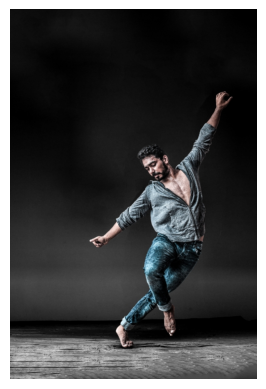



Image: 785746.jpg
Image ID: 785746
Caption: Grayscale Photo Of A Man Wearing Sweater
Image Size: (736, 512)


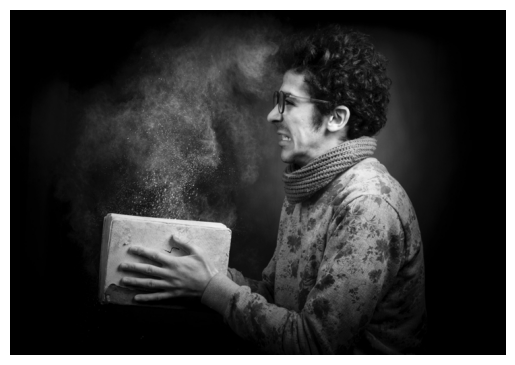



Image: 4k-wallpaper-atmosphere-clouds-1597779.jpg
Image ID: 4k-wallpaper-atmosphere-clouds-1597779
Caption: No caption found
Image Size: (768, 512)


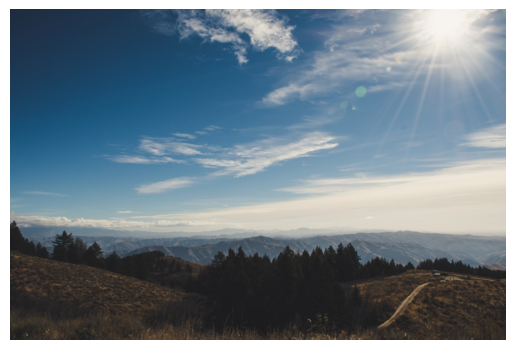



Image: afro-beautiful-beauty-1820969.jpg
Image ID: afro-beautiful-beauty-1820969
Caption: No caption found
Image Size: (512, 640)


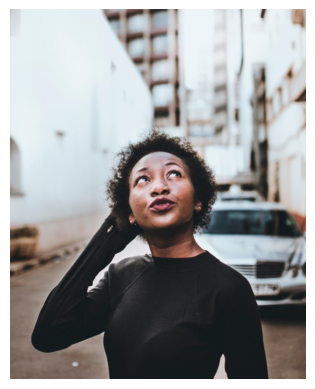



Image: buildings-cars-city-1402776.jpg
Image ID: buildings-cars-city-1402776
Caption: No caption found
Image Size: (512, 672)


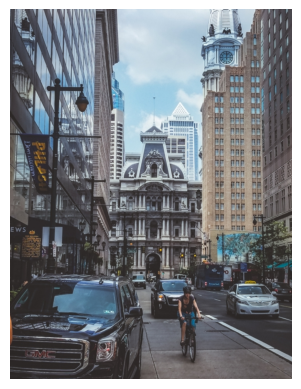

In [4]:
#look at random samples of images from the dataset
sample_images = random.sample(image_filenames, 5)

for img_file in sample_images:
    img_path = os.path.join(images_path, img_file)
    img = Image.open(img_path)
    #get image id and filename
    img_id = img_file.split('.')[0]

    #look up caption
    caption = imageid_to_caption.get(img_id, "No caption found")

    print("\n")
    print(f"Image: {img_file}")
    print(f"Image ID: {img_id}")
    print(f"Caption: {caption}")
    print(f"Image Size: {img.size}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

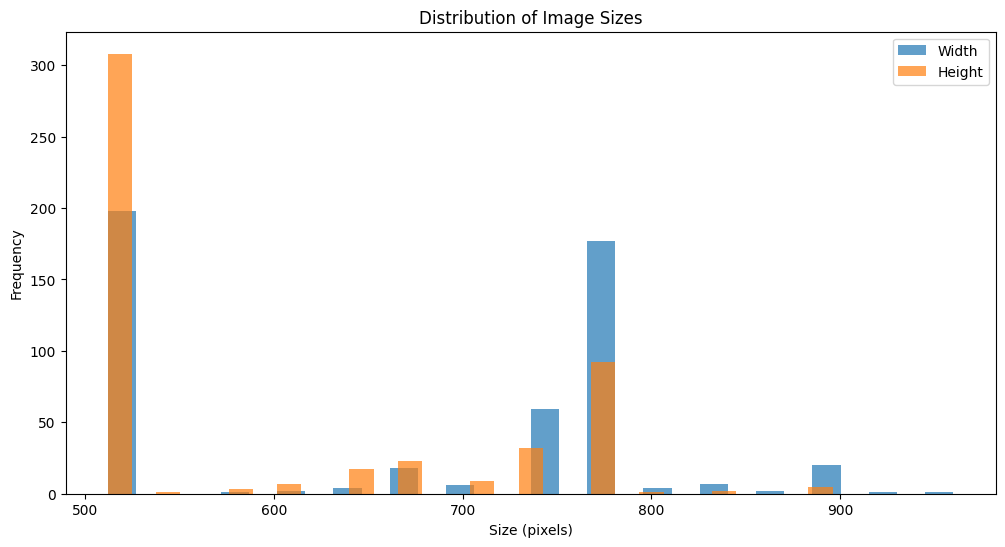

In [5]:
'''
EDA Plot: Distribution of Image Sizes
'''

#check the image sizes via plotting the distribution of the image sizes
sizes = []
for img_file in random.sample(image_filenames, 500):
    img_path = os.path.join(images_path, img_file)
    img = Image.open(img_path)
    sizes.append(img.size)

widths, heights = zip(*sizes)
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.legend()
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.show()

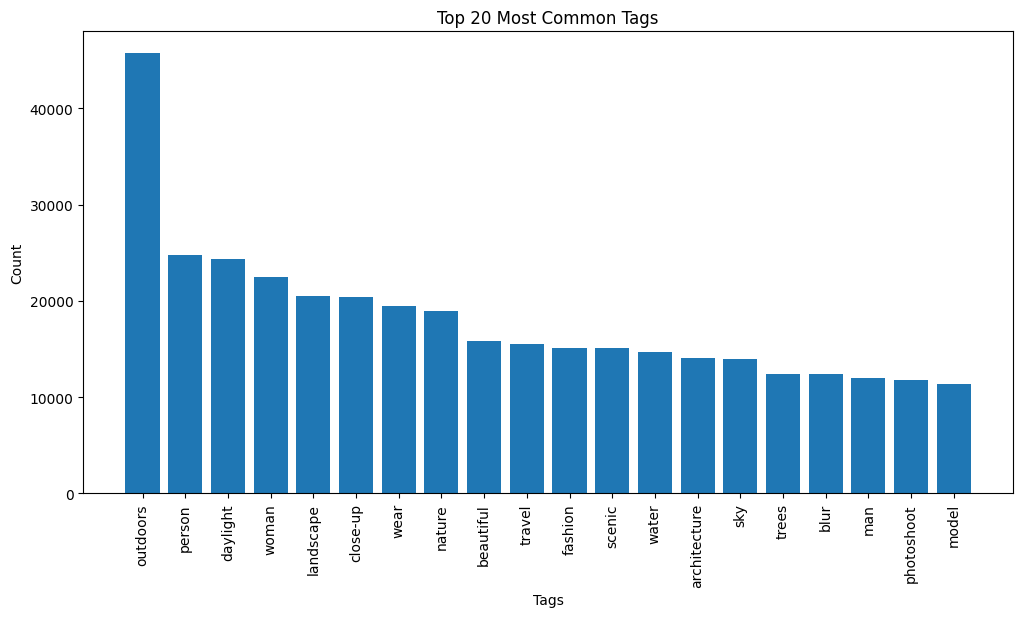

In [6]:
'''
EDA Plot: Top 20 Most Common Tags
'''

all_tags_data = []

for tags_list in attributes['tags'].dropna():
    all_tags_data.extend(tags_list)

tag_counts = Counter(all_tags_data)

#get the top 20 tags
most_common_tags = tag_counts.most_common(20)

tags, counts = zip(*most_common_tags)

plt.figure(figsize=(12, 6))
plt.bar(tags, counts)
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

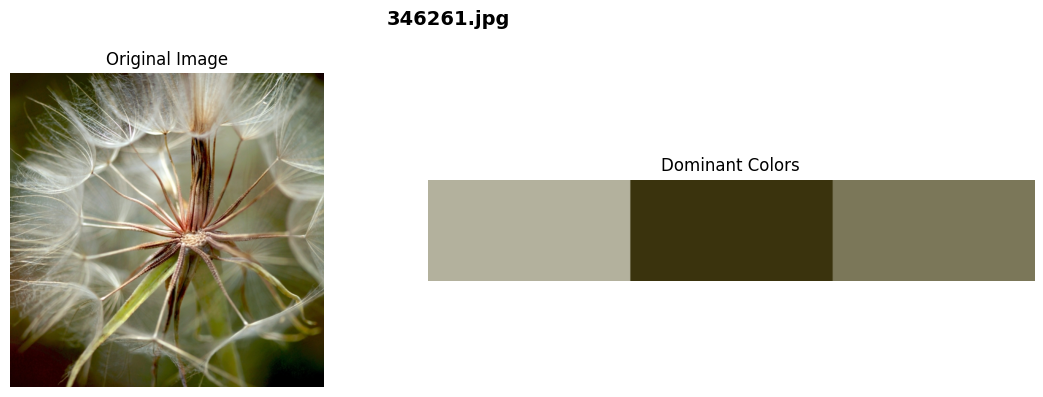

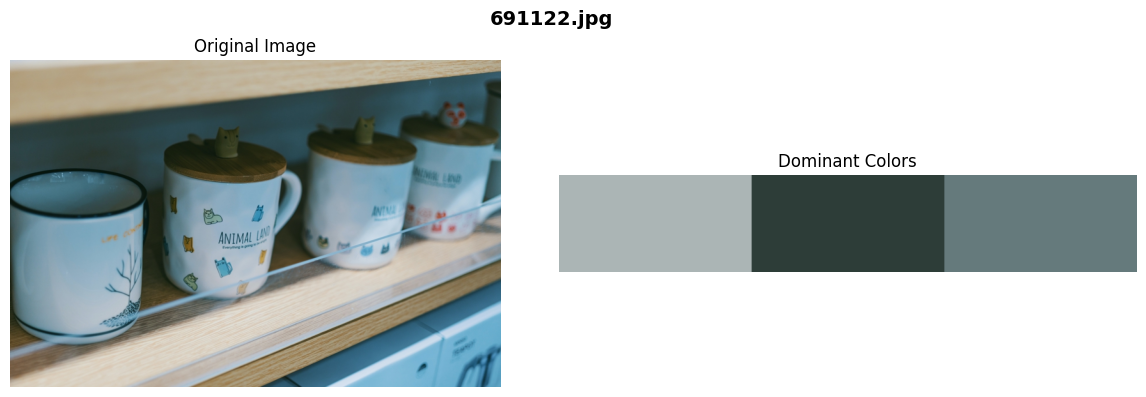

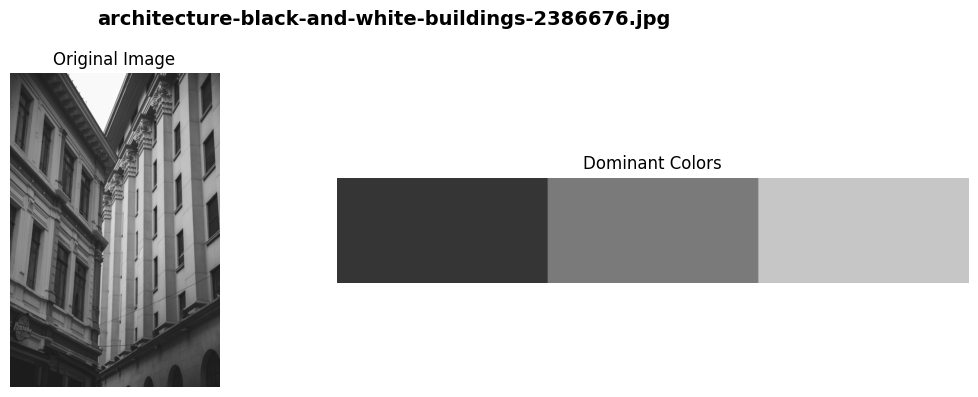

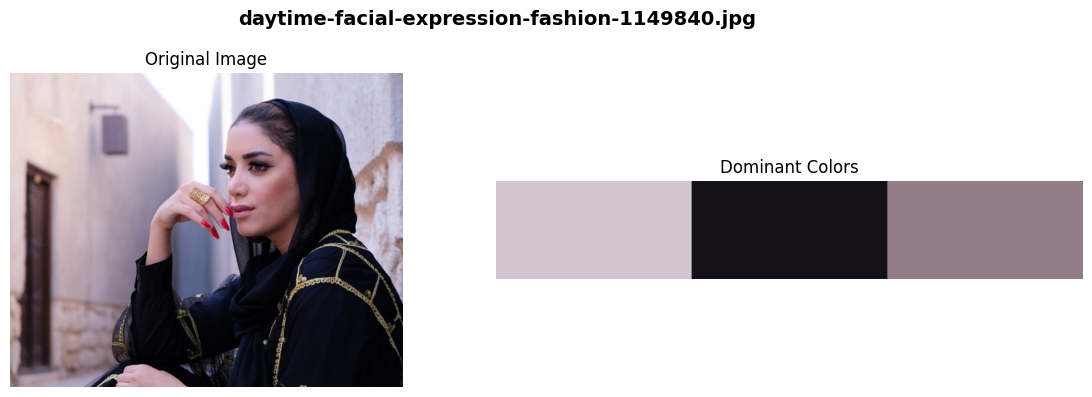

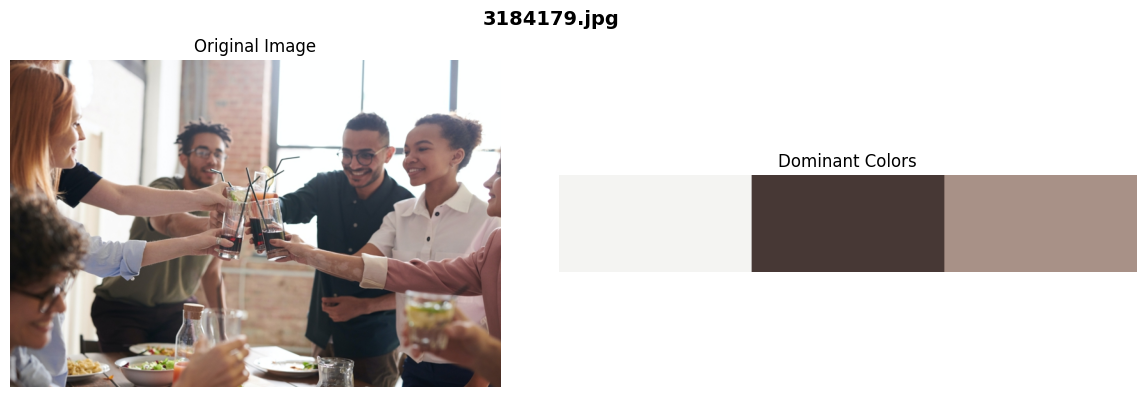

In [7]:
'''
EDA Plot: Dominant Colors in Random Images
'''

def get_main_color(img_path, k=3):
    #read the image from the path
    img = cv2.imread(img_path)

    #convert the image color space from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #reshape the image to a 2D array of pizels (rows = pixels, columns = RGB)
    img = img.reshape((-1, 3))

    #apply KMeans clustering to group pixels into k color clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img)

    #obtain cluster centers (dominant colors)
    colors = kmeans.cluster_centers_.astype(int)

    #return the dominant colors
    return colors



#implement the function to get the dominant colors for 25 random images
for filename in random.sample(image_filenames, 5):
    img_path = os.path.join(images_path, filename)

    #get dominant colors from the image
    colors = get_main_color(img_path)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    #show original image
    img =Image.open(img_path)
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title('Original Image')

    #create an image filled with dominant colors stacked horizontally
    color_palette = np.zeros((50, 300, 3), dtype=np.uint8)

    step = color_palette.shape[1] // len(colors)
    for i, color in enumerate(colors):
        color_palette[:, i * step:(i + 1) * step] = color

    axs[1].imshow(color_palette)
    axs[1].axis('off')
    axs[1].set_title('Dominant Colors')

    #setup overall title
    fig.suptitle(filename, fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()


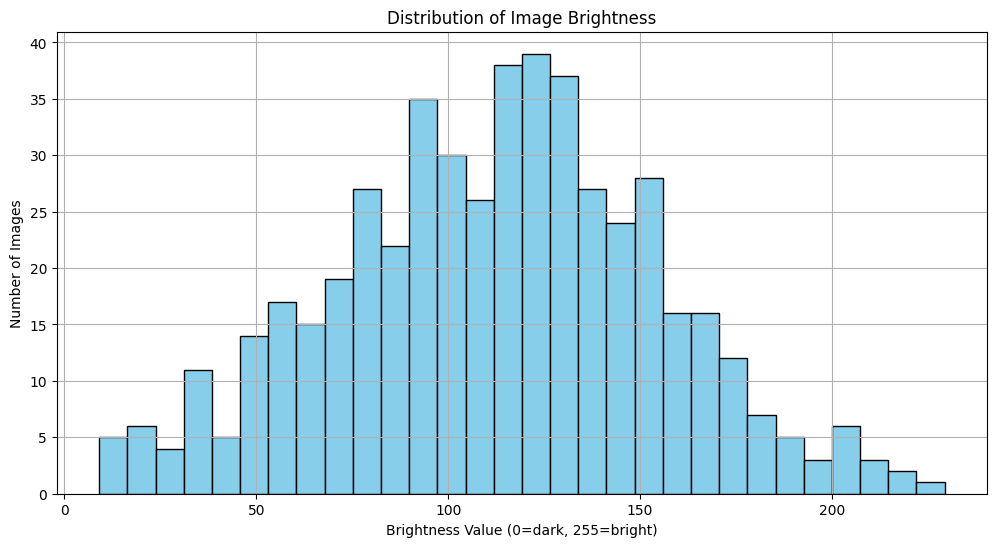

In [8]:
'''
EDA Plot: Brightness / Darknesss Histogram
'''
#store brightness values
brightness_values = []

#calculate brightness fora random sample of images
for filename in random.sample(image_filenames, 500):
    img_path = os.path.join(images_path, filename)
    #read the image
    img = cv2.imread(img_path)
    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #take average pixel intensity
    brightness = np.mean(gray)
    #append to the brightness values list
    brightness_values.append(brightness)



#plot the histogram of brightness values
plt.figure(figsize=(12, 6))
plt.hist(brightness_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Image Brightness")
plt.xlabel("Brightness Value (0=dark, 255=bright)")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

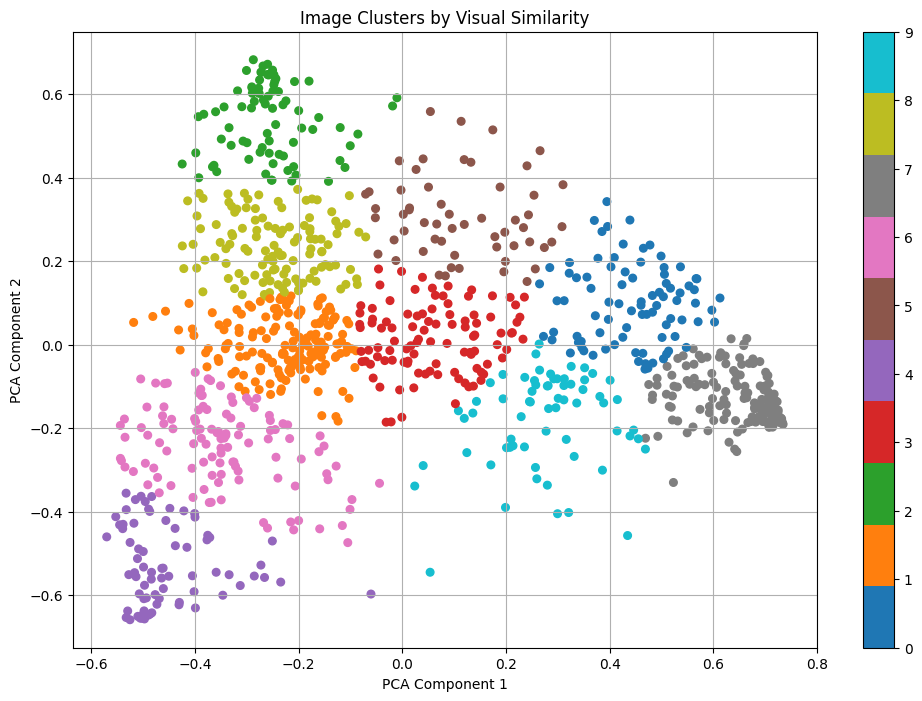

In [9]:
'''
EDA Plot: Cluster Images by Visual Similarity
'''

def extract_features(img_path):
    #read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #resize to small for faster processing
    img = cv2.resize(img, (64, 64))
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

#extract features from a random sample of images
sample_files = random.sample(image_filenames, 1000)
features = []

for filename in sample_files:
    img_path = os.path.join(images_path, filename)
    feature = extract_features(img_path)
    features.append(feature)

features = np.array(features)

#dimensionality reduction: PCA to 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

#clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(features_pca)

#plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='tab10', s=30)
plt.title("Image Clusters by Visual Similarity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.grid(True)
plt.show()

# HANNA'S NEXT STEPS AS OF SATURDAY, APRIL 27:
1. Preprocessing (resize, normalize, format data)
2. Build CVAE Model (code your conditional VAE architecture)
3. Train the Model (feed images + labels (moods/tags) into CVAE)
4. Sample / Generate (pick a mood --> generate matching images)
5. GUI (build dropdown GUI for mood selection, color selection, and a slider for brightness, saturation, and other picture features) 

## Defining Keywords for List of Moods

In [10]:
#define mood keywords
mood_keywords = {
    "Cozy": ["cozy", "warm", "comfortable", "blanket", "fireplace", "pillow", "bed", "relax"],
    "Dreamy": ["dreamy", "fantasy"],
    "Romantic": ["romantic", "love", "passion"],
    "Minimalist": ["minimalist", "simple", "clean"],
    "Vibrant": ["vibrant", "colorful", "bright"],
    "Vintage": ["vintage", "old", "retro", "nostaglic"],
    "Natural": ["natural", "outdoors", "nature"],
    "Adventurous": ["adventurous", "explore", "travel"],
    "Mystical": ["mystical", "magical", "fantasy"],
}

#define color keywords
color_keywords = {
    "Pink": ["pink", "rose", "blush"],
    "Red": ["red", "crimson", "scarlet"],
    "Orange": ["orange", "tangerine", "peach"],
    "Yellow": ["yellow", "gold", "sunshine"],
    "Green": ["green", "emerald", "forest"],
    "Blue": ["blue", "azure", "navy"],
    "Purple": ["purple", "lavender", "violet"],
    "Brown": ["brown", "chocolate", "cocoa"],
    "Gray": ["gray", "silver", "charcoal"],
    "Black": ["black", "ebony", "jet"],
    "White": ["white", "ivory", "pearl"],
    "Beige": ["beige", "cream", "tan"],
    "Gold": ["gold", "glitter", "shiny"],
    "Silver": ["silver", "metallic", "shiny"],
    "Multicolor": ["multicolored", "colorful", "rainbow"]
}

## Prepping for Resizing

In [ ]:
#this is a script to organize the Pexel images by mood tags and resize them for training 

import os
import json 
from PIL import Image
import shutil
import kagglehub

# Download latest version
path = kagglehub.dataset_download("innominate817/pexels-110k-512p-min-jpg")

print("Path to dataset files:", path)



#Settings
original_image_directory = "imageGenerationProject/data/moods/all_images"
metadata_file = "/Users/hannazelis/.cache/kagglehub/datasets/innominate817/pexels-110k-512p-min-jpg/versions/4/pexels-110k-512p-min-jpg/"
# under this directory includes: attributes_df.json, images folder, pexels-prompts-pairs.json, and tags.txt; want to move this to data folder under imageGenerationProject
output_base_directory = "imageGenerationProject/data/sorted"
resize_to= (128, 128)



#define keywords for each mood
mood_keywords = {
    "Cozy": ["cozy", "warm", "comfortable", "blanket", "fireplace", "pillow", "bed", "relax"],
    "Dreamy": ["dreamy", "fantasy", "whimsical", "clouds", "soft", "dream", "imagination"],
    "Romantic": ["romantic", "love", "passion", "couple", "flowers", "candlelight", "intimate", "roses", "valentine"],
    "Minimalist": ["minimalist", "simple", "clean", "white", "empty", "spacious", "bare"],
    "Vibrant": ["vibrant", "colorful", "bright", "bold", "saturated", "lively", "energetic"],
    "Natural": ["natural", "outdoors", "nature", "forest", "mountain", "river", "wildlife", "green"],
}



#load metadata
print("Loading metadata")
with open(metadata_file, 'r') as f:
    metadata = json.load(f)



#sort and resize
print("Sorting and resizing images")
os.makedirs(output_base_directory, exist_ok=True)
counts = {mood: 0 for mood in mood_keywords.keys()}

for entry in metadata:
    filename = entry.get("filename")
    tags = entry.get("tags", [])
    src_path = os.path.join(original_image_directory, filename)

    if not os.path.exists(src_path):
        print(f"File not found: {src_path}")
        continue

    #check whcih mood this image fits into
    for mood, keywords in mood_keywords.items():
        if any(kw in tags for kw in keywords):
            dest_dir = os.path.join(output_base_directory, mood)
            os.makedirs(dest_dir, exist_ok=True)
            dest_path = os.path.join(dest_dir, filename)

            try:
                img = Image.open(src_path).convert("RGB")
                img = img.resize(resize_to)
                img.save(dest_path)
                counts[mood] += 1

            except Exception as e:
                print(f"Error processing {filename}: {e}")
            
            break   #assign to only one mood



#end of script
print("Sorting and resizing complete. Image counts:")
for mood, count in counts.items():
    print(f"{mood}: {count} images")